In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [2]:
# df = pd.read_csv('s3://olistdashdb/csv/olist_customers_dataset.csv')

GETTING THE DATA

In [3]:
from olistdash.data import Olist
data = Olist().get_data()

TOTAL PAYMENTS TO OLIST

In [15]:
data['order_payments']['payment_value'].sum()

16008872.12

In [16]:
df = data['order_payments'][['order_id','payment_value']].merge(data['orders'][['order_id','order_purchase_timestamp']], on='order_id', how='outer')

In [17]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df = df.set_index('order_purchase_timestamp').sort_index()
df

order_id  payment_value
order_purchase_timestamp                                                 
2016-09-04 21:15:19       2e7a8482f6fb09756ca50c10d7bfc047         136.23
2016-09-05 00:15:34       e5fa5a7210941f7d56d0208e4e071d35          75.06
2016-09-13 15:24:19       809a282bbd5dbcabb6f2f724fca862ec          40.95
2016-09-15 12:16:38       bfbd0f9bdef84302105ad712db648a6c            NaN
2016-10-02 22:07:52       71303d7e93b399f5bcd537d124c0bcfa         109.34
...                                                    ...            ...
2018-09-29 09:13:03       392ed9afd714e3c74767d0c4d3e3f477         137.03
2018-10-01 15:30:09       616fa7d4871b87832197b2a137a115d2          80.38
2018-10-03 18:55:29       a2ac6dad85cf8af5b0afb510a240fe8c         197.55
2018-10-16 20:16:02       b059ee4de278302d550a3035c4cdb740         222.03
2018-10-17 17:30:18       10a045cdf6a5650c21e9cfeb60384c16          89.71

[103887 rows x 2 columns]

order_purchase_timestamp
2016-12-31      59362.34
2017-12-31    7249746.73
2018-12-31    8699763.05
Freq: A-DEC, Name: payment_value, dtype: float64


Text(0.5, 1.0, 'Yearly payment value')

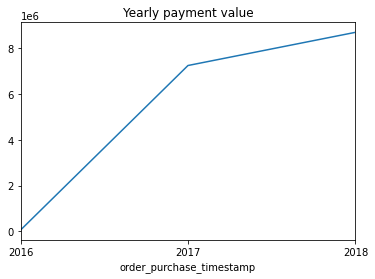

In [13]:
print(df.resample('Y')['payment_value'].sum())
df.resample('Y')['payment_value'].sum().plot()
plt.title('Yearly payment value')

order_purchase_timestamp
2016-09-30        252.24
2016-10-31      59090.48
2016-11-30          0.00
2016-12-31         19.62
2017-01-31     138488.04
2017-02-28     291908.01
2017-03-31     449863.60
2017-04-30     417788.03
2017-05-31     592918.82
2017-06-30     511276.38
2017-07-31     592382.92
2017-08-31     674396.32
2017-09-30     727762.45
2017-10-31     779677.88
2017-11-30    1194882.80
2017-12-31     878401.48
2018-01-31    1115004.18
2018-02-28     992463.34
2018-03-31    1159652.12
2018-04-30    1160785.48
2018-05-31    1153982.15
2018-06-30    1023880.50
2018-07-31    1066540.75
2018-08-31    1022425.32
2018-09-30       4439.54
2018-10-31        589.67
Freq: M, Name: payment_value, dtype: float64


Text(0.5, 1.0, 'Monthly payment value')

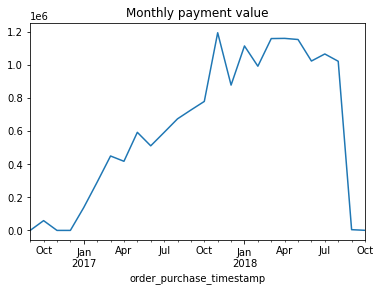

In [15]:
print(df.resample('M')['payment_value'].sum())
df.resample('M')['payment_value'].sum().plot()
plt.title('Monthly payment value')

In [20]:
df_month = pd.DataFrame(df.resample('M')['payment_value'].sum()).reset_index()
df_month.head()

order_purchase_timestamp  payment_value
0               2016-09-30         252.24
1               2016-10-31       59090.48
2               2016-11-30           0.00
3               2016-12-31          19.62
4               2017-01-31      138488.04

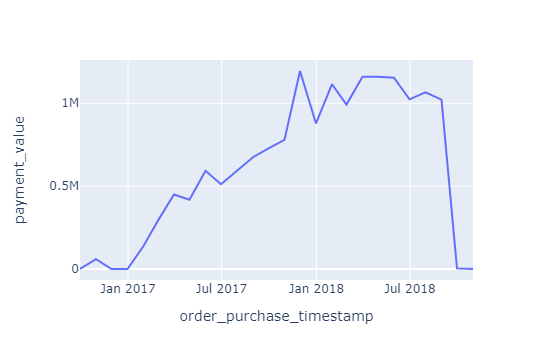

In [21]:
fig = px.line(df_month,x='order_purchase_timestamp',y='payment_value')
fig.show()

In [26]:
fig = go.Scatter(df_month,x='order_purchase_timestamp',y='payment_value')
fig.show()

order_purchase_timestamp
2016-09-30        252.24
2016-10-31      59090.48
2016-11-30          0.00
2016-12-31         19.62
2017-01-31     138488.04
2017-02-28     291908.01
2017-03-31     449863.60
2017-04-30     417788.03
2017-05-31     592918.82
2017-06-30     511276.38
2017-07-31     592382.92
2017-08-31     674396.32
2017-09-30     727762.45
2017-10-31     779677.88
2017-11-30    1194882.80
2017-12-31     878401.48
2018-01-31    1115004.18
2018-02-28     992463.34
2018-03-31    1159652.12
2018-04-30    1160785.48
2018-05-31    1153982.15
2018-06-30    1023880.50
2018-07-31    1066540.75
2018-08-31    1022425.32
2018-09-30       4439.54
2018-10-31        589.67
Freq: M, Name: payment_value, dtype: float64

In [92]:
df['month'] = pd.to_datetime(df['order_purchase_timestamp']).dt.month

In [93]:
df.groupby('year')['payment_value'].sum()

year
2016      59362.34
2017    7249746.73
2018    8699763.05
Name: payment_value, dtype: float64

In [94]:
df.head()

order_id  payment_value order_purchase_timestamp  \
0  b81ef226f3fe1789b1e8b2acac839d17          99.33      2018-04-25 22:01:49   
1  a9810da82917af2d9aefd1278f1dcfa0          24.39      2018-06-26 11:01:38   
2  25e8ea4e93396b6fa0d3dd708e76c1bd          65.71      2017-12-12 11:19:55   
3  ba78997921bbcdc1373bb41e913ab953         107.78      2017-12-06 12:04:06   
4  42fdf880ba16b47b59251dd489d4441a         128.45      2018-05-21 13:59:17   

         date  year  month  
0  2018-04-25  2018      4  
1  2018-06-26  2018      6  
2  2017-12-12  2017     12  
3  2017-12-06  2017     12  
4  2018-05-21  2018      5

In [95]:
df = df.sort_values(by=['date'])

In [49]:
y = df.groupby('date')['payment_value'].sum().reset_index(drop=True)
y

0      136.23
1       75.06
2       40.95
3        0.00
4      109.34
        ...  
629    137.03
630     80.38
631    197.55
632    222.03
633     89.71
Name: payment_value, Length: 634, dtype: float64

In [50]:
x = df['date'].drop_duplicates()
x

29482     2016-09-04
63668     2016-09-05
61038     2016-09-13
103886    2016-09-15
35342     2016-10-02
             ...    
95876     2018-09-29
38098     2018-10-01
66093     2018-10-03
5958      2018-10-16
11904     2018-10-17
Name: date, Length: 634, dtype: object

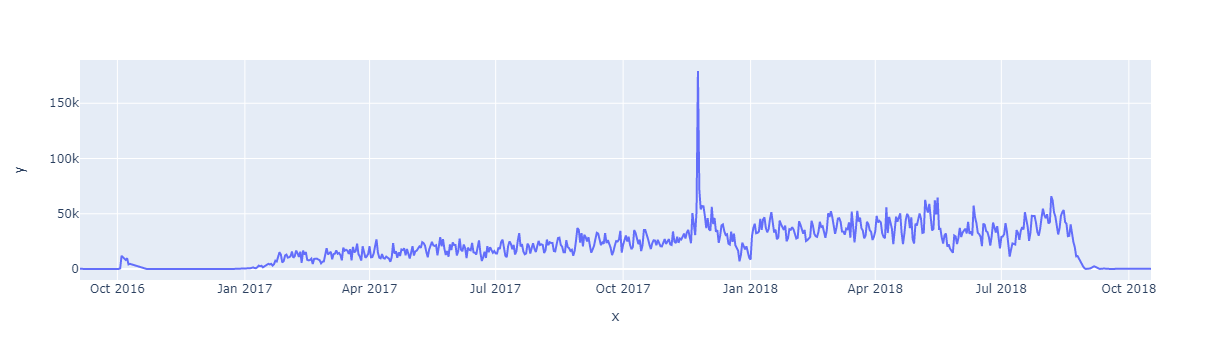

In [73]:
df_1 = pd.concat([x, y], axis=1)

# df = px.data.stocks()
# fig = px.line(df, x='date', y="GOOG")
# fig.show()

fig = px.line(df_1,x,y)
# fig.update_traces(xperiod="M1")
fig.show()

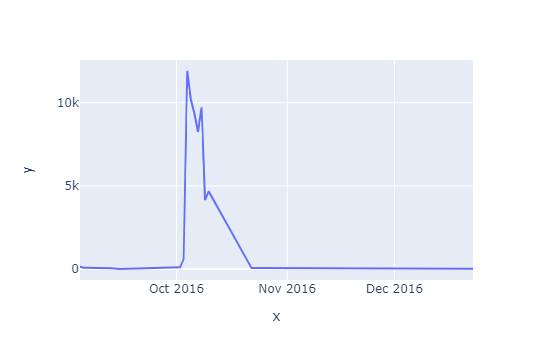

In [102]:
def year_2016():
    df_2016 = df[df['year'] == 2016]
    y = df_2016.groupby('date')['payment_value'].sum().reset_index(drop=True)
    x = df_2016['date'].drop_duplicates()
    df_plot = pd.concat([x, y], axis=1)
    fig = px.line(df_plot,x,y)
    return fig.show()

year_2016()

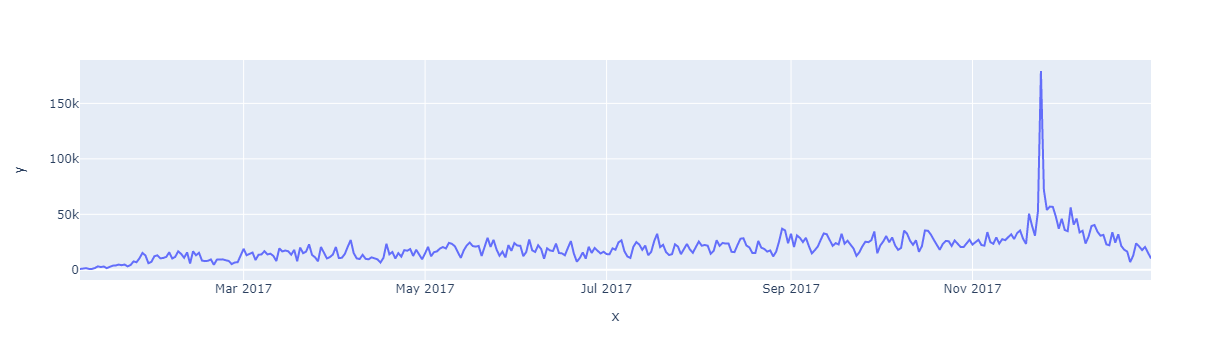

In [111]:
def year_2017():
    df_2017 = df[df['year'] == 2017]
    y = df_2017.groupby('date')['payment_value'].sum().reset_index(drop=True)
    x = df_2017['date'].drop_duplicates()
    df_plot = pd.concat([x, y], axis=1)
    fig = px.line(df_plot,x,y)
#     fig.update_traces(xperiod="M0.5")
    return fig.show()

year_2017()

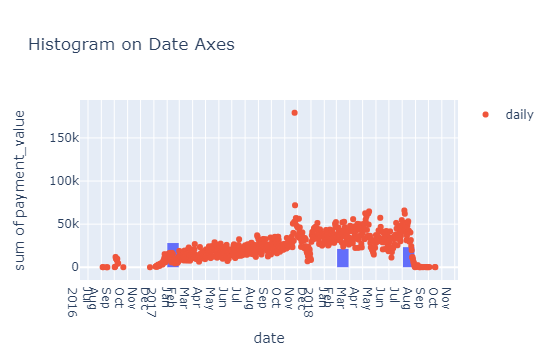

In [98]:
# fig = px.histogram(df_1, x="date", y="payment_value", histfunc="sum", title="Histogram on Date Axes")
# fig.update_traces(xbins_size="M")
# fig.update_xaxes(showgrid=True, ticklabelmode="period", dtick="M1", tickformat="%b\n%Y")
# fig.update_layout(bargap=0.1)
# fig.add_trace(go.Scatter(mode="markers", x=x, y=y, name="daily"))
# fig.show()

In [4]:
df_graph = pd.read_csv('../data/df_graph.csv')
df_graph.head()

Date  Calibre Index Fund "Nasdaq Composite, x"  \
0  2007-12-31          135.149994            2018-02-07   
1  2008-01-02          133.220001            2018-02-08   
2  2008-01-03          133.220001            2018-02-09   
3  2008-01-04          129.949997            2018-02-12   
4  2008-01-07          130.369995            2018-02-13   

   "Nasdaq Composite, y" "MSCI EAFE Index Fund (ETF), x"  \
0            7051.979980                      2008-01-02   
1            6777.160156                      2008-01-03   
2            6874.490234                      2008-01-04   
3            6981.959961                      2008-01-07   
4            7013.509766                      2008-01-08   

   MSCI EAFE Index Fund (ETF)  "Dow Jones Industrial Average, y"  \
0                       78.22                       13264.820313   
1                       78.35                       13043.959961   
2                       76.57                       13056.719727   
3                       76.65                       12800.179688   
4                       76.22                       12827.490234   

   "S&amp;P 500 Index, y"  
0             1468.359985  
1             1447.160034  
2             1447.160034  
3             1411.630005  
4             1416.180054

In [50]:
type(df_graph['Date'])

pandas.core.series.Series

In [6]:
fig = go.Figure(
    [
        go.Scatter(
            x=df_graph["Date"],
            y=df_graph["Calibre Index Fund"],
            line=dict(color = "#DE3562"),
            name="Calibre Index Fund",
        )
    ]
)
fig.add_trace(
    go.Scatter(
        x=df_graph["Date"],
        y=df_graph["MSCI EAFE Index Fund (ETF)"],
        line={"color": "#35CDDE"},
        name="MSCI EAFE Index Fund (ETF)"
    )
)
fig.update_layout(
    autosize=True,
#                 width=700,
#                 height=200,
#                 font=dict(
#                     family="Lato, Sans-Serif",
#                     size= 10
#                     ),
                margin={
                    "r": 30,
                    "t": 30,
                    "b": 30,
                    "l": 30,
                },
                showlegend=True,
#                 titlefont=dict(
#                     family="Lato, Sans-Serif",
#                     size= 10
#                     ),
                xaxis={
                    "autorange": True,
                    "range": [
                        "2007-12-31",
                        "2018-03-06",
                    ],
                    "rangeselector": {
                        "buttons": [
                            {
                                "count": 1,
                                "label": "1Y",
                                "step": "year",
                                "stepmode": "backward",
                            },
                            {
                                "count": 3,
                                "label": "3Y",
                                "step": "year",
                                "stepmode": "backward",
                            },
                            {
                                "count": 5,
                                "label": "5Y",
                                "step": "year",
                            },
                            {
                                "count": 10,
                                "label": "10Y",
                                "step": "year",
                                "stepmode": "backward",
                            },
                            {
                                "label": "All",
                                "step": "all",
                            },
                        ]
                    },
                    "showline": True,
                    "type": "date",
                    "zeroline": False,
                },
                yaxis={
                    "autorange": True,
                    "range": [
                        18.6880162434,
                        278.431996757,
                    ],
                    "showline": True,
                    "type": "linear",
                    "zeroline": False,
                },
            )
fig.show()

NameError: name 'df_graph' is not defined

In [18]:
df_daily = pd.DataFrame(df.resample('D')['payment_value'].sum()).reset_index()
df_daily.head()

order_purchase_timestamp  payment_value
0               2016-09-04         136.23
1               2016-09-05          75.06
2               2016-09-06           0.00
3               2016-09-07           0.00
4               2016-09-08           0.00

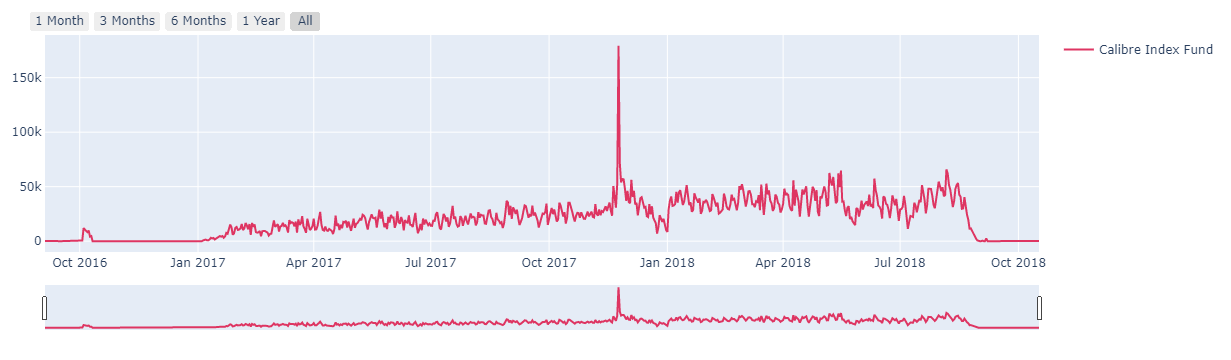

In [19]:
fig = go.Figure(
    [
        go.Scatter(
            x=df_daily["order_purchase_timestamp"],
            y=df_daily["payment_value"],
            line=dict(color = "#DE3562"),
            name="Calibre Index Fund",
        )
    ]
)
# fig.add_trace(
#     go.Scatter(
#         x=df_dayly["Date"],
#         y=df_dayly["MSCI EAFE Index Fund (ETF)"],
#         line={"color": "#35CDDE"},
#         name="MSCI EAFE Index Fund (ETF)"
#     )
# )
fig.update_layout(
    autosize=True,
#                 width=700,
#                 height=200,
#                 font=dict(
#                     family="Lato, Sans-Serif",
#                     size= 10
#                     ),
    showlegend = True,
    hovermode  = 'x',
    margin={
        "r": 30,
        "t": 30,
        "b": 30,
        "l": 30,
    },
#                 titlefont=dict(
#                     family="Lato, Sans-Serif",
#                     size= 10
#                     ),
    xaxis={
        "autorange": True,
#                     "range": [
#                         "2007-12-31",
#                         "2018-08-31",
#                     ],
        "rangeselector": {
            "buttons": [
                {
                    "count": 1,
                    "label": "1 Month",
                    "step": "month",
                    "stepmode": "backward",
                },
                {
                    "count": 3,
                    "label": "3 Months",
                    "step": "month",
                    "stepmode": "backward",
                },
                {
                    "count": 6,
                    "label": "6 Months",
                    "step": "month",
                    "stepmode": "backward",
                },
                {
                    "count": 1,
                    "label": "1 Year",
                    "step": "year",
                    "stepmode": "backward",
                },
                {
                    "label": "All",
                    "step": "all",
                },
            ]
        },
        'rangeslider':{'visible': True},
        "showline": True,
        "type": "date",
        "zeroline": False,
    },
    yaxis={
        "autorange": True,
        "range": [
            18.6880162434,
            278.431996757,
        ],
        "showline": True,
        "type": "linear",
        "zeroline": False,
    },
)
fig.show()

In [20]:
df_daily

order_purchase_timestamp  payment_value
0                 2016-09-04         136.23
1                 2016-09-05          75.06
2                 2016-09-06           0.00
3                 2016-09-07           0.00
4                 2016-09-08           0.00
..                       ...            ...
769               2018-10-13           0.00
770               2018-10-14           0.00
771               2018-10-15           0.00
772               2018-10-16         222.03
773               2018-10-17          89.71

[774 rows x 2 columns]

In [25]:
df_daily_2 = df_daily[df_daily['order_purchase_timestamp'] <= '2018-07-31']
df_daily_2

order_purchase_timestamp  payment_value
0                 2016-09-04         136.23
1                 2016-09-05          75.06
2                 2016-09-06           0.00
3                 2016-09-07           0.00
4                 2016-09-08           0.00
..                       ...            ...
691               2018-07-27       33331.12
692               2018-07-28       30168.17
693               2018-07-29       36468.26
694               2018-07-30       46288.01
695               2018-07-31       54652.10

[696 rows x 2 columns]

In [26]:
from olistdash.seller import Seller
seller = Seller()
sellers = seller.get_training_data()
sellers.head()

seller_id        seller_city seller_state  \
0  3442f8959a84dea7ee197c632cb2df15           campinas           SP   
1  d1b65fc7debc3361ea86b5f14c68d2e2         mogi guacu           SP   
2  ce3ad9de960102d0677a81f5d0bb7b2d     rio de janeiro           RJ   
3  c0f3eea2e14555b6faeea3dd58c1b1c3          sao paulo           SP   
4  51a04a8a6bdcb23deccc82b0b80742cf  braganca paulista           SP   

   delay_to_carrier  wait_time     date_first_sale      date_last_sale  \
0          1.514329  13.018588 2017-05-05 16:25:11 2017-08-30 12:50:19   
1          0.155190   9.065716 2017-03-29 02:10:34 2018-06-06 20:15:21   
2          0.000000   4.042292 2018-07-30 12:44:49 2018-07-30 12:44:49   
3          0.000000   5.667187 2018-08-03 00:44:08 2018-08-03 00:44:08   
4          3.353727  35.314861 2017-11-14 12:15:25 2017-11-14 12:15:25   

   share_of_one_stars  share_of_five_stars  review_score  n_orders  quantity  \
0            0.333333             0.333333          3.00         3         3   
1            0.050000             0.725000          4.55        40        41   
2            0.000000             1.000000          5.00         1         1   
3            0.000000             1.000000          5.00         1         1   
4            1.000000             0.000000          1.00         1         1   

   quantity_per_order     sales  
0               1.000    218.70  
1               1.025  11703.07  
2               1.000    158.00  
3               1.000     79.99  
4               1.000    167.99

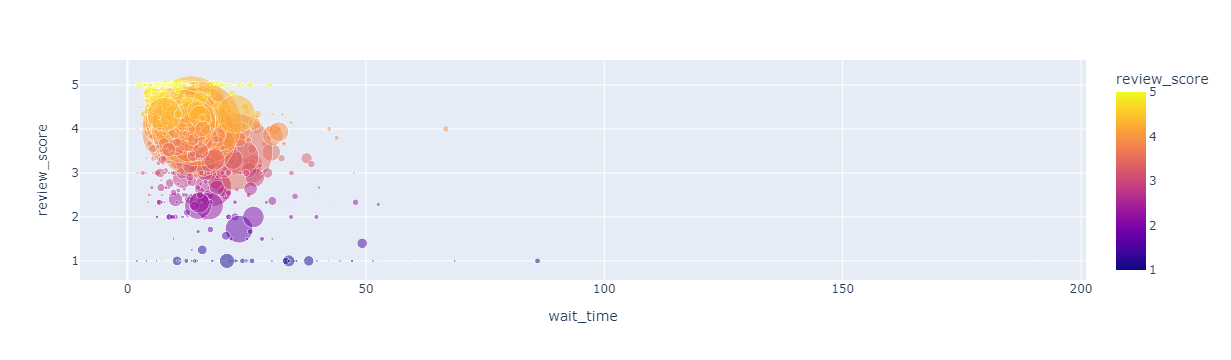

In [32]:
fig = px.scatter(data_frame=sellers,
                 x="wait_time",
                 y="review_score",
                 size="sales",
                 color="review_score",
                 size_max=60,
                 opacity=0.5)
fig.show()

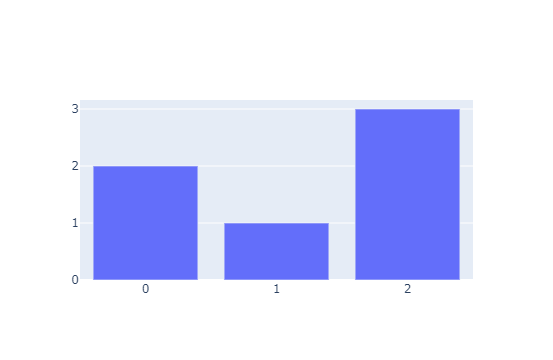

In [5]:
import plotly.graph_objects as go
fig = go.Figure(
    data=[go.Bar(y=[2, 1, 3])],
)
fig.show()

In [20]:
data['order_reviews']['review_score'].value_counts().reset_index()

index  review_score
0      5         57420
1      4         19200
2      1         11858
3      3          8287
4      2          3235

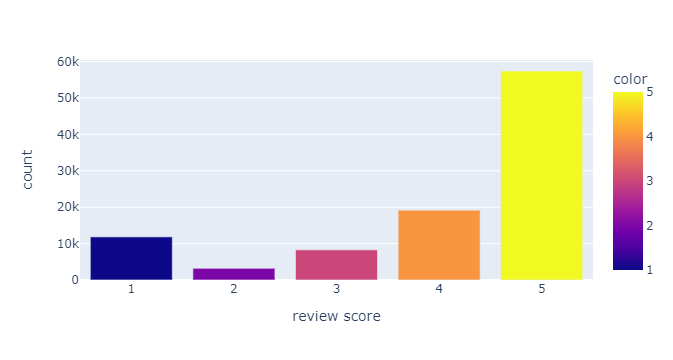

In [37]:
fig = px.bar(
    data['order_reviews']['review_score'].value_counts().reset_index(),
    y=df['review_score'],
    x=df['index'],
    color=df['index'],
    labels=dict(x='review score',y='count')
)
fig.update_layout(showlegend=False)
fig.show()

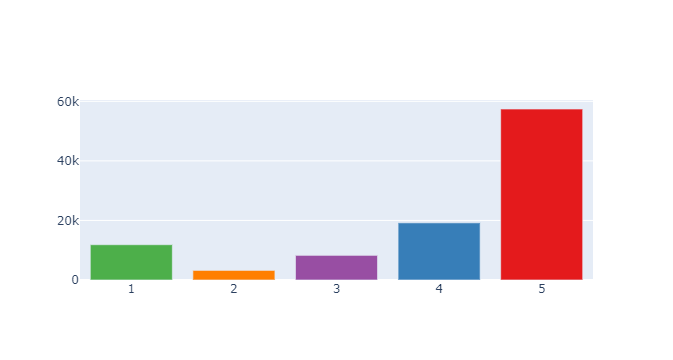

In [64]:
fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=data['order_reviews']['review_score'].value_counts().reset_index()['index'],
        y=data['order_reviews']['review_score'].value_counts().reset_index()['review_score'],
        marker_color=['rgb(228,26,28)', 'rgb(55,126,184)', 'rgb(77,175,74)', 'rgb(152,78,163)', 'rgb(255,127,0)']
    )
)

fig.show()


In [41]:
data['order_reviews']['review_score'].value_counts()

5    57420
4    19200
1    11858
3     8287
2     3235
Name: review_score, dtype: int64

In [63]:
print(px.colors.qualitative.Set1)

['rgb(228,26,28)', 'rgb(55,126,184)', 'rgb(77,175,74)', 'rgb(152,78,163)', 'rgb(255,127,0)', 'rgb(255,255,51)', 'rgb(166,86,40)', 'rgb(247,129,191)', 'rgb(153,153,153)']


In [6]:
data['order_reviews'][['review_score']]

review_score
0                 4
1                 5
2                 5
3                 5
4                 5
...             ...
99995             5
99996             5
99997             4
99998             1
99999             1

[100000 rows x 1 columns]

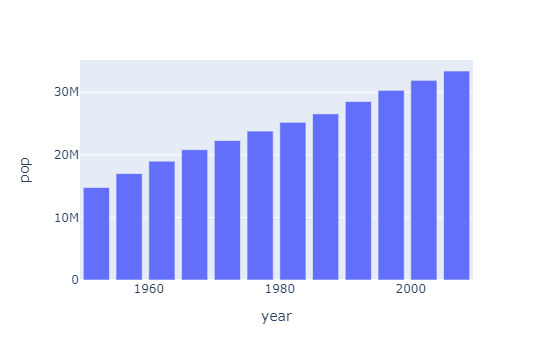

In [17]:
import plotly.express as px
data_canada = px.data.gapminder().query("country == 'Canada'")
fig = px.bar(data_canada, x='year', y='pop')
fig.show()

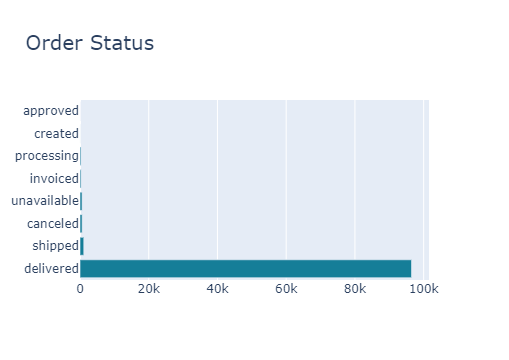

In [65]:
fig = go.Figure()
fig.add_trace(
        go.Bar(
            y=data['orders']['order_status'].value_counts().reset_index()['index'],
            x=data['orders']['order_status'].value_counts().reset_index()['order_status'],
            marker_color='#157E98',
            orientation='h'
        )
    )
fig.update_layout(title_text="Order Status",
                  title_font_size=20)
fig.show()

In [66]:
import dash
import dash_table

In [67]:
data['orders']['order_status'].value_counts().reset_index()

index  order_status
0    delivered         96478
1      shipped          1107
2     canceled           625
3  unavailable           609
4     invoiced           314
5   processing           301
6      created             5
7     approved             2

In [71]:
df = data['orders']['order_status'].value_counts().reset_index()

dash_table.DataTable(
    id='table',
    columns=[{"name": i, "id": i} for i in df.columns],
    data=df.to_dict('records'),
)

DataTable(id='table', columns=[{'name': 'index', 'id': 'index'}, {'name': 'order_status', 'id': 'order_status'}], data=[{'index': 'delivered', 'order_status': 96478}, {'index': 'shipped', 'order_status': 1107}, {'index': 'canceled', 'order_status': 625}, {'index': 'unavailable', 'order_status': 609}, {'index': 'invoiced', 'order_status': 314}, {'index': 'processing', 'order_status': 301}, {'index': 'created', 'order_status': 5}, {'index': 'approved', 'order_status': 2}])

In [5]:
def table_order_status():
    return data['orders']['order_status'].value_counts().reset_index()

table_order_status().columns

Index(['index', 'order_status'], dtype='object')

In [6]:
columns=[{"name": i, "id": i} for i in table_order_status().columns],

In [7]:
columns

([{'name': 'index', 'id': 'index'},
  {'name': 'order_status', 'id': 'order_status'}],)

In [11]:
import dash
import dash_table
dash_table.DataTable(
                                id='table',
                                columns=[{"name": i, "id": i} for i in table_order_status().columns],
                                data=table_order_status().to_dict('records')
)

DataTable(id='table', columns=[{'name': 'index', 'id': 'index'}, {'name': 'order_status', 'id': 'order_status'}], data=[{'index': 'delivered', 'order_status': 96478}, {'index': 'shipped', 'order_status': 1107}, {'index': 'canceled', 'order_status': 625}, {'index': 'unavailable', 'order_status': 609}, {'index': 'invoiced', 'order_status': 314}, {'index': 'processing', 'order_status': 301}, {'index': 'created', 'order_status': 5}, {'index': 'approved', 'order_status': 2}])